In [1]:
import os
from collections import defaultdict

# Define base directory
base_dir = r"C:/Users/abhis/Downloads/Breast_cancer_dataset/BreaKHis_v1/BreaKHis_v1/histology_slides/breast"

# Initialize dictionary to hold counts
image_counts = defaultdict(int)

# Walk through each class (benign/malignant)
for class_type in ['benign', 'malignant']:
    class_path = os.path.join(base_dir, class_type, 'SOB')
    
    if not os.path.exists(class_path):
        continue

    # Iterate through subtypes
    for subtype in os.listdir(class_path):
        subtype_path = os.path.join(class_path, subtype)
        if not os.path.isdir(subtype_path):
            continue  # Skip files like .txt
        
        # Walk through each patient's folder
        for patient_id in os.listdir(subtype_path):
            patient_path = os.path.join(subtype_path, patient_id)
            if not os.path.isdir(patient_path):
                continue
            
            # Go into each magnification folder (40X, 100X, etc.)
            for magnification in os.listdir(patient_path):
                magnification_path = os.path.join(patient_path, magnification)
                if not os.path.isdir(magnification_path):
                    continue
                
                # Count image files
                for img in os.listdir(magnification_path):
                    if img.lower().endswith(('.png', '.jpg', '.jpeg', '.tif')):
                        image_counts[subtype] += 1

# Print result
for subtype, count in image_counts.items():
    print(f"{subtype}: {count} images")


adenosis: 444 images
fibroadenoma: 1014 images
phyllodes_tumor: 453 images
tubular_adenoma: 569 images
ductal_carcinoma: 3451 images
lobular_carcinoma: 626 images
mucinous_carcinoma: 792 images
papillary_carcinoma: 560 images


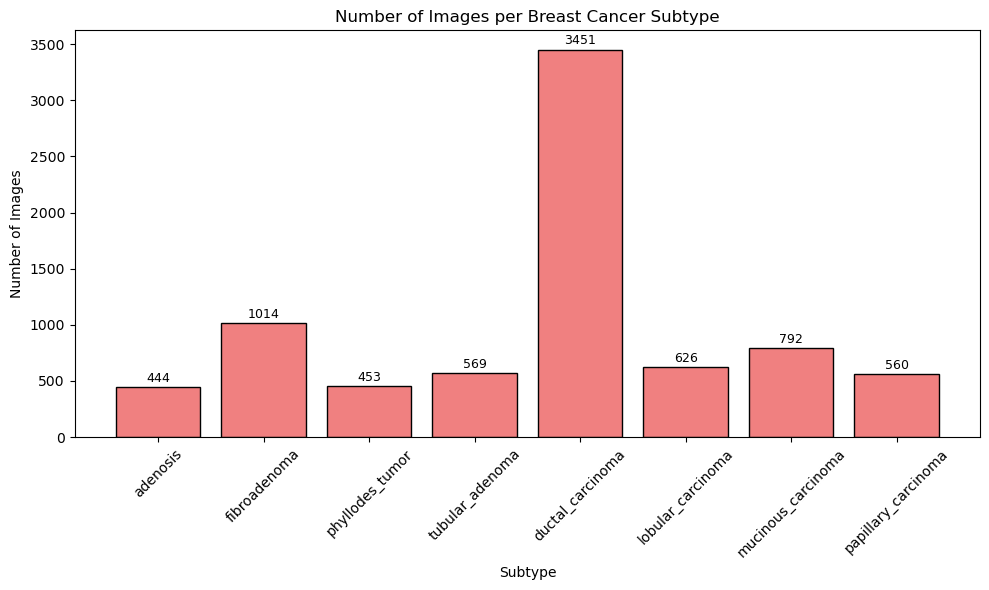

In [4]:
import matplotlib.pyplot as plt

# Use your dynamically built image_counts from earlier
# Define the exact order of subtypes you want
ordered_subtypes = [
    'adenosis',
    'fibroadenoma',
    'phyllodes_tumor',
    'tubular_adenoma',
    'ductal_carcinoma',
    'lobular_carcinoma',
    'mucinous_carcinoma',
    'papillary_carcinoma'
]

# Get the counts in the specified order
counts = [image_counts[subtype] for subtype in ordered_subtypes]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(ordered_subtypes, counts, color='lightcoral', edgecolor='black')

# Labels and title
plt.xlabel('Subtype')
plt.ylabel('Number of Images')
plt.title('Number of Images per Breast Cancer Subtype')
plt.xticks(rotation=45)

# Add counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, f'{height}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [5]:
#total iamge counts
# Define which subtypes are benign and malignant
benign_subtypes = {'adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma'}
malignant_subtypes = {'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'}

# Compute totals
total_benign = sum(count for subtype, count in image_counts.items() if subtype in benign_subtypes)
total_malignant = sum(count for subtype, count in image_counts.items() if subtype in malignant_subtypes)
total_images = sum(image_counts.values())

# Print results
print(f"Total benign images: {total_benign}")
print(f"Total malignant images: {total_malignant}")
print(f"Total images: {total_images}")


Total benign images: 2480
Total malignant images: 5429
Total images: 7909


In [ ]:
##

In [6]:
import os
from collections import defaultdict

# Base dataset directory
base_dir = r"C:/Users/abhis/Downloads/Breast_cancer_dataset/BreaKHis_v1/BreaKHis_v1/histology_slides/breast"

# Dictionary to store patient IDs and their image counts per subtype
subtype_to_patients = defaultdict(set)
patient_image_count = defaultdict(int)

# Loop through 'benign' and 'malignant' folders
for category in ['benign', 'malignant']:
    category_path = os.path.join(base_dir, category)
    if not os.path.isdir(category_path):
        continue

    # e.g., SOB
    for sob_folder in os.listdir(category_path):
        sob_path = os.path.join(category_path, sob_folder)
        if not os.path.isdir(sob_path):
            continue

        # Now iterate through true subtypes
        for subtype in os.listdir(sob_path):
            subtype_path = os.path.join(sob_path, subtype)
            if not os.path.isdir(subtype_path):
                continue

            for patient_id in os.listdir(subtype_path):
                patient_path = os.path.join(subtype_path, patient_id)
                if not os.path.isdir(patient_path):
                    continue

                subtype_key = f"{category}/{subtype}"
                subtype_to_patients[subtype_key].add(patient_id)

                # Loop through magnification folders
                for mag in os.listdir(patient_path):
                    mag_path = os.path.join(patient_path, mag)
                    if not os.path.isdir(mag_path):
                        continue

                    # Count valid image files
                    for img_name in os.listdir(mag_path):
                        if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.tif')):
                            patient_image_count[patient_id] += 1

# ✅ Print number of patients per subtype
print("📌 Number of patients per subtype:\n")
for subtype, patients in subtype_to_patients.items():
    print(f"{subtype}: {len(patients)} patients")

# ✅ Print number of images per patient
print("\n📷 Number of images per patient:\n")
for patient_id, img_count in sorted(patient_image_count.items()):
    print(f"{patient_id}: {img_count} images")


📌 Number of patients per subtype:

benign/adenosis: 4 patients
benign/fibroadenoma: 10 patients
benign/phyllodes_tumor: 3 patients
benign/tubular_adenoma: 7 patients
malignant/ductal_carcinoma: 38 patients
malignant/lobular_carcinoma: 5 patients
malignant/mucinous_carcinoma: 9 patients
malignant/papillary_carcinoma: 6 patients

📷 Number of images per patient:

SOB_B_A_14-22549AB: 121 images
SOB_B_A_14-22549CD: 132 images
SOB_B_A_14-22549G: 130 images
SOB_B_A_14-29960CD: 61 images
SOB_B_F_14-14134: 142 images
SOB_B_F_14-14134E: 94 images
SOB_B_F_14-21998CD: 137 images
SOB_B_F_14-21998EF: 121 images
SOB_B_F_14-23060AB: 81 images
SOB_B_F_14-23060CD: 57 images
SOB_B_F_14-23222AB: 68 images
SOB_B_F_14-25197: 120 images
SOB_B_F_14-29960AB: 68 images
SOB_B_F_14-9133: 126 images
SOB_B_PT_14-21998AB: 235 images
SOB_B_PT_14-22704: 158 images
SOB_B_PT_14-29315EF: 60 images
SOB_B_TA_14-13200: 65 images
SOB_B_TA_14-15275: 53 images
SOB_B_TA_14-16184: 132 images
SOB_B_TA_14-16184CD: 124 images
SOB_B

In [ ]:
#dividing the dataset into training, validation, and testing set

In [31]:
import os
from pathlib import Path
import pandas as pd

# Optional: progress bar
from tqdm import tqdm

# Root directory
DATA_ROOT = Path("C:/Users/abhis/Downloads/Breast_cancer_dataset/BreaKHis_v1/BreaKHis_v1/histology_slides/breast")

# Accepted image formats
VALID_EXTS = ('.png', '.jpg', '.jpeg')

# Subtype to numeric label mapping
subtype_to_idx = {
    'adenosis': 0,
    'fibroadenoma': 1,
    'phyllodes_tumor': 2,
    'tubular_adenoma': 3,
    'ductal_carcinoma': 4,
    'lobular_carcinoma': 5,
    'mucinous_carcinoma': 6,
    'papillary_carcinoma': 7
}

# Store metadata
data = []

# Loop over label folders (benign / malignant)
for label_dir in ['benign', 'malignant']:
    label_path = DATA_ROOT / label_dir
    if not label_path.exists():
        continue

    sob_path = label_path / 'SOB'
    if not sob_path.exists():
        continue

    for subtype in os.listdir(sob_path):
        subtype_path = sob_path / subtype
        if not subtype_path.is_dir():
            continue

        for patient in os.listdir(subtype_path):
            patient_path = subtype_path / patient
            if not patient_path.is_dir():
                continue

            patient_id = patient.split("_")[-1]

            for magnification in os.listdir(patient_path):
                mag_path = patient_path / magnification
                if not mag_path.is_dir():
                    continue

                image_paths = list(mag_path.rglob("*"))
                for img_path in image_paths:
                    if not img_path.suffix.lower() in VALID_EXTS:
                        continue

                    data.append({
                        'image_path': str(img_path),
                        'patient_id': patient_id,
                        'subtype': subtype,
                        'label': label_dir,
                        'magnification': magnification,
                        'subtype_label': subtype_to_idx.get(subtype)  # Add label here directly
                    })

# Save metadata to CSV
df = pd.DataFrame(data)
df.to_csv("breast_cancer_metadata.csv", index=False)

print(f"✅ Collected and labeled metadata for {len(df)} images. Saved to breast_cancer_metadata.csv")


✅ Collected and labeled metadata for 7909 images. Saved to breast_cancer_metadata.csv


In [32]:
#to download metadata csv file
df.to_csv("C:/Users/abhis/Downloads/breast_cancer_metadata.csv", index=False)


In [11]:
import pandas as pd

df = pd.read_csv("breast_cancer_metadata.csv")
print(df.head())
print(df['patient_id'].nunique(), "unique patients")


                                          image_path  patient_id   subtype  \
0  C:\Users\abhis\Downloads\Breast_cancer_dataset...  14-22549AB  adenosis   
1  C:\Users\abhis\Downloads\Breast_cancer_dataset...  14-22549AB  adenosis   
2  C:\Users\abhis\Downloads\Breast_cancer_dataset...  14-22549AB  adenosis   
3  C:\Users\abhis\Downloads\Breast_cancer_dataset...  14-22549AB  adenosis   
4  C:\Users\abhis\Downloads\Breast_cancer_dataset...  14-22549AB  adenosis   

    label magnification  
0  benign          100X  
1  benign          100X  
2  benign          100X  
3  benign          100X  
4  benign          100X  
81 unique patients


In [13]:
##splitting data into train test validate - adding new column in csv file
from sklearn.model_selection import train_test_split

# Unique patient IDs
unique_patients = df['patient_id'].unique()
train_ids, temp_ids = train_test_split(unique_patients, test_size=0.30, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)

# Assign split labels
def assign_split(pid):
    if pid in train_ids:
        return 'train'
    elif pid in val_ids:
        return 'val'
    else:
        return 'test'

df['split'] = df['patient_id'].apply(assign_split)

# Save updated metadata
df.to_csv("breast_cancer_metadata_with_split.csv", index=False)
print(df['split'].value_counts())


split
train    5388
test     1387
val      1134
Name: count, dtype: int64


In [14]:
from IPython.display import FileLink

# Display a clickable download link
FileLink("breast_cancer_metadata_with_split.csv")


C:\Users\abhis\breast_cancer_metadata_with_split.csv

In [15]:
df = pd.read_csv("breast_cancer_metadata_with_split.csv")
print(df.head())

                                          image_path  patient_id   subtype  \
0  C:\Users\abhis\Downloads\Breast_cancer_dataset...  14-22549AB  adenosis   
1  C:\Users\abhis\Downloads\Breast_cancer_dataset...  14-22549AB  adenosis   
2  C:\Users\abhis\Downloads\Breast_cancer_dataset...  14-22549AB  adenosis   
3  C:\Users\abhis\Downloads\Breast_cancer_dataset...  14-22549AB  adenosis   
4  C:\Users\abhis\Downloads\Breast_cancer_dataset...  14-22549AB  adenosis   

    label magnification split  
0  benign          100X  test  
1  benign          100X  test  
2  benign          100X  test  
3  benign          100X  test  
4  benign          100X  test  


In [16]:
##Printing each subtype images present in train, validate and test dataset

# Load the dataset
metadata_path = "breast_cancer_metadata_with_split.csv"
df = pd.read_csv(metadata_path)

# Group by split, label, and subtype — then count
subtype_distribution = df.groupby(['split', 'label', 'subtype']).size().unstack(fill_value=0)

# Display the result
print("\n Subtype Distribution Across Splits (number of images):")
print(subtype_distribution)




 Subtype Distribution Across Splits (number of images):
subtype          adenosis  ductal_carcinoma  fibroadenoma  lobular_carcinoma  \
split label                                                                    
test  benign          121                 0           304                  0   
      malignant         0               709             0                  0   
train benign          323                 0           585                  0   
      malignant         0              2208             0                501   
val   benign            0                 0           125                  0   
      malignant         0               534             0                125   

subtype          mucinous_carcinoma  papillary_carcinoma  phyllodes_tumor  \
split label                                                                 
test  benign                      0                    0                0   
      malignant                 188                    0               

In [ ]:
##I am not sure what we are going to do next but it will work like separation

In [ ]:
##Created a pytorch DAtaset class
##This reads image paths and labels from the split metadata.

In [17]:
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd
import os

class BreastCancerDataset(Dataset):
    def __init__(self, metadata, transform=None):
        self.metadata = metadata  # a Pandas DataFrame or list of dicts
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        row = self.metadata[idx]
        image_path = row['image_path']
        label = row['subtype_label']  # 0 or 1

        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label


In [ ]:
##Define transforms (including data augmentation)

In [18]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [ ]:
##Create PyTorch Dataset objects from your splits

In [19]:
#Reloading metadata CSV
df = pd.read_csv("breast_cancer_metadata_with_split.csv")  


In [20]:
#Split the loaded DataFrame again (using the 'split' column)
train_df = df[df['split'] == 'train']
val_df = df[df['split'] == 'val']
test_df = df[df['split'] == 'test']


In [21]:
#Create PyTorch Dataset objects from your splits
train_dataset = BreastCancerDataset(train_df.to_dict(orient='records'), transform=train_transform)
val_dataset = BreastCancerDataset(val_df.to_dict(orient='records'), transform=val_test_transform)
test_dataset = BreastCancerDataset(test_df.to_dict(orient='records'), transform=val_test_transform)


In [33]:
# Create DataLoaders
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [34]:
import torch
import torch.nn as nn
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained weights
weights = EfficientNet_B0_Weights.DEFAULT
model = efficientnet_b0(weights=weights)

# Modify the classifier for 8-class classification (subtypes)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, 8)  # 8 subtypes

model = model.to(device)


In [24]:
print(model)  # Shows model architecture
print(f"Model is on device: {next(model.parameters()).device}")  # Confirms it's on CPU or CUDA


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [25]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")


CUDA available: True
Device: NVIDIA GeForce RTX 3050 Laptop GPU


In [35]:
#Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
